## Data Cleansing

Data cleaning is a crucial step in the data preprocessing pipeline. It involves identifying and rectifying issues in your dataset to ensure that it’s ready for analysis.

In [1]:
#impor syntax, you need numpy, pandas, matplotlib (for visualization), seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load data kpop idol
df = pd.read_csv('Train.csv')

In [3]:
df.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


# Common Data Cleaning Tasks in Python:

### 1. Handling Missing Values
Incomplete data sets frequently contain missing values, posing a challenge for analysis. Techniques like imputation, which involves filling missing values with estimates, or dropping rows/columns with significant missing data are commonly employed to handle this issue. These methods help ensure that the dataset remains usable and provides reliable insights.

- We will handle missing values in the column "Var_1" through imputation.

Imputation is replace missing values with a statistical measure such as mean, median, or mode of the column.

In [5]:
# count the occurrences of each unique value in the 'Var_1' column

df['Var_1'].value_counts()

Var_1
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: count, dtype: int64

In [6]:
# count the number of missing (NaN) values

df['Var_1'].isna().sum()

76

In [7]:
# replaces all NaN values in the 'Var_1' column with the calculated mode value.

val = df['Var_1'].mode().values[0]

df['Var_1'] = df['Var_1'].fillna(val)

In [8]:
# the result

df['Var_1'].value_counts()

Var_1
Cat_6    5314
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: count, dtype: int64

This method of imputation is useful for categorical or discrete data where replacing missing values with the most common value can preserve the distribution of the data to some extent.

- We will handle missing values in the column "Work_Experience" through imputation.

In [9]:
# we'll fillna Height
# first we can check the shape

df.shape[0]

8068

In [10]:
df['Work_Experience'].isna().sum()

829

In [11]:
df['Work_Experience'].isna().sum()/df.shape[0]

0.1027516113039167

In [12]:
# the unique is not that far, so we can fill the NaN

df.Work_Experience.nunique()

15

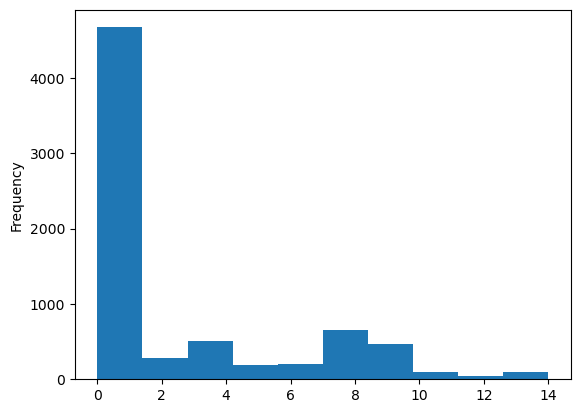

In [13]:
# show the chart visual
df.Work_Experience.plot(kind='hist');

from the visual this chart is negative skewnes

In [14]:
# fillna
# if negative or positive skewness we can used median, buf if it normal skewnes you can used mode

val = df.Work_Experience.median()
df['Work_Experience'] = df.Work_Experience.fillna(val)

In [15]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


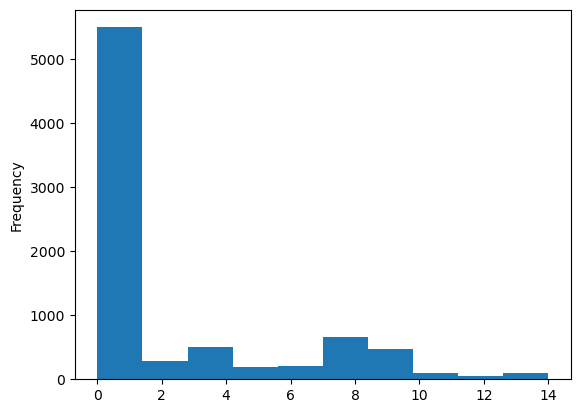

In [16]:
# check the chart againt
df.Work_Experience.plot(kind='hist');

- We will handle missing values in the column "Graduated" through imputation.

In [17]:
df['Graduated'].value_counts()

Graduated
Yes    4968
No     3022
Name: count, dtype: int64

In [18]:
val = df['Graduated'].mode().values[0]

df['Graduated'] = df['Graduated'].fillna(val)

In [19]:
# the result

df['Graduated'].value_counts()

Graduated
Yes    5046
No     3022
Name: count, dtype: int64

- Filling Missing Data in the column 'Profession' with 'Unknown'

In [20]:
df['Profession'].fillna('unknown', inplace=True)

- Filling Missing Data in the column 'Ever_Married' with 'Unknown'

In [21]:
df['Ever_Married'].fillna('unknown', inplace=True)

- Filling Missing Data in the column 'Family_Size' with 'Unknown'

In [22]:
df['Family_Size'].fillna('unknown', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_36656\2672659465.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Family_Size'].fillna('unknown', inplace=True)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   object 
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 693.5+ KB


## Save Clean Data in CSV format

In [24]:
df_clean = pd.DataFrame(df)
df_clean.to_csv("Train_clean.csv", index=False)
df_clean

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,unknown,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
